## Installation needed

In [1]:
# !pip install tensorflow
# !pip install opencv-python
# !pip install keras

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('dark_background')
import seaborn as sns
from tqdm import tqdm

import cv2
import os
import tensorflow as tf
import sklearn as sk

import warnings
warnings.filterwarnings('ignore')

print('Using Tensorflow version:', tf.__version__)

Using Tensorflow version: 2.4.1


In [3]:
main_data = pd.read_csv('data_labels_mainData.csv')
extra_data = pd.read_csv('data_labels_extraData.csv')

In [4]:
main_data

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0
...,...,...,...,...,...,...
9891,1625,60,1625.png,epithelial,2,1
9892,1626,60,1626.png,epithelial,2,1
9893,1627,60,1627.png,epithelial,2,1
9894,1628,60,1628.png,epithelial,2,1


In [5]:
extra_data

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0
...,...,...,...,...
10379,20028,99,20028.png,0
10380,20029,99,20029.png,0
10381,20030,99,20030.png,0
10382,20031,99,20031.png,0


In [6]:
from sklearn.model_selection import train_test_split
X = main_data['ImageName']
y = main_data['cellType']

train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.33)

train_Y = train_Y.astype('float32').ravel()
test_Y = test_Y.astype('float32').ravel()

In [7]:
def create_train_data(directory, img_list):
    IMAGE_SIZE = 27
    train_data = []
    for img in tqdm(img_list, desc='Extracting Image Progress'):
        path = os.path.join(directory, img)
        img = cv2.resize(cv2.imread(path), (IMAGE_SIZE,IMAGE_SIZE))
        train_data.append(np.array(img))
    print("Successfully import images!")
    # Convert to np.array and normalize pixel values to be between 0 and 1 
    return np.array(train_data).astype('float32') / 255.0 

In [8]:
# CHANGE THE PATH TO IMAGE FOLDER IN YOUR LOCAL DEVICE!
path = r"C:\Users\luong\Documents\GitHub\ML\Asm\ASM2\patch_images"

train_X_img = create_train_data(path, train_X.tolist())
test_X_img = create_train_data(path, test_X.tolist())

Extracting Image Progress:   4%|█▉                                                | 123/3266 [00:00<00:02, 1229.40it/s]

Successfully import images!


Extracting Image Progress: 100%|█████████████████████████████████████████████████| 3266/3266 [00:02<00:00, 1438.53it/s]

Successfully import images!


In [9]:
train_Y.dtype

dtype('float32')

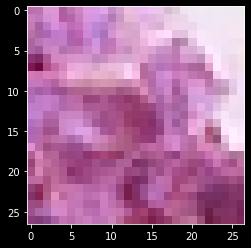

In [10]:
plt.imshow(train_X_img[0])

## VGG16

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
model = Sequential()

model.add(Conv2D(input_shape=(27,27,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [13]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4, activation="softmax"))

In [14]:
from tensorflow.keras.optimizers import Adam

opt = Adam(lr=0.000001)
model.compile(optimizer = opt , 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 256)         2

In [16]:
train_X_img.shape

(6630, 27, 27, 3)

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", 
                             monitor='val_acc',
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', period=1)

early = EarlyStopping(monitor='accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

hist = model.fit(train_X_img ,train_Y, 
                 validation_data = (test_X_img, test_Y), 
                 batch_size = 32, 
                 epochs = 15, 
                 verbose=1,
                 callbacks=[early,checkpoint])

Epoch 1/15
208/208 [==============================] - 162s 780ms/step - loss: 1.2830 - accuracy: 0.4204 - val_loss: 1.2995 - val_accuracy: 0.3956
Epoch 2/15
208/208 [==============================] - 163s 784ms/step - loss: 1.2636 - accuracy: 0.4204 - val_loss: 1.2657 - val_accuracy: 0.3956
Epoch 3/15
208/208 [==============================] - 162s 777ms/step - loss: 1.2094 - accuracy: 0.4204 - val_loss: 1.1814 - val_accuracy: 0.3956
Epoch 4/15
208/208 [==============================] - 158s 762ms/step - loss: 1.1051 - accuracy: 0.4807 - val_loss: 1.0895 - val_accuracy: 0.5147
Epoch 5/15
208/208 [==============================] - 163s 784ms/step - loss: 1.0336 - accuracy: 0.5520 - val_loss: 1.0259 - val_accuracy: 0.5530
Epoch 6/15
208/208 [==============================] - 164s 788ms/step - loss: 0.9853 - accuracy: 0.5698 - val_loss: 0.9926 - val_accuracy: 0.5618
Epoch 7/15
208/208 [==============================] - 165s 794ms/step - loss: 0.9638 - accuracy: 0.5787 - val_loss: 0.9653 -

In [25]:
model.save('Baseline VGG16')

INFO:tensorflow:Assets written to: Baseline VGG16\assets


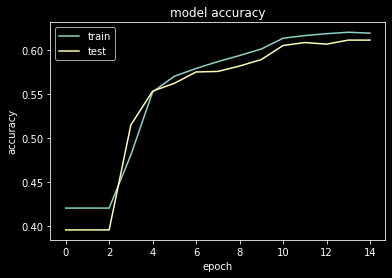

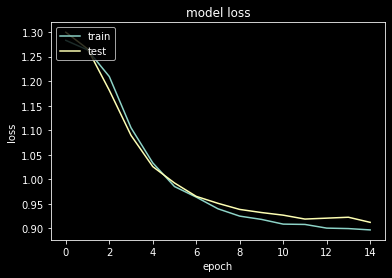

In [27]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()